Matplotlib is building the font cache; this may take a moment.


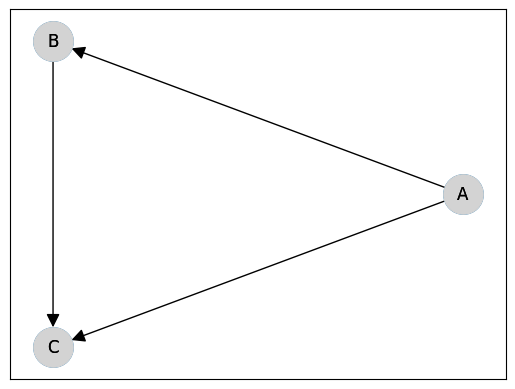

In [1]:
import pycid

cbn = pycid.CausalBayesianNetwork(
    [("A", "B"), ("A", "C"), ("B", "C")],  # specifies the MAICD's nodes and edges.
)

cbn.draw()

In [5]:
cbn.model["A"] = {0: 0.4, 1: 0.6}
# alternatively: cbn.model['A'] = pycid.bernoulli(0.6)

# print it as a probability table
print(cbn.get_cpds("A").prob_table())

+------+-----+
| A(0) | 0.4 |
+------+-----+
| A(1) | 0.6 |
+------+-----+


In [6]:
cbn.model["B"] = lambda A: pycid.bernoulli((1 + A) / 3)

print("We can see the result in a few different ways:")
print("\nThe model object contains just what we added:")
print(cbn.model["B"])
print("\nThe CPD has interpreted it as a stochastic function:")
print(cbn.get_cpds("B"))
print("\nAnd as a probability table")
print(cbn.get_cpds("B").prob_table())

We can see the result in a few different ways:

The model object contains just what we added:
<function <lambda> at 0x30ceb5240>

The CPD has interpreted it as a stochastic function:
StochasticFunctionCPD<B> 
{'A': 0}  ->  {0: 0.6666666666666667, 1: 0.3333333333333333}
{'A': 1}  ->  {0: 0.33333333333333337, 1: 0.6666666666666666}

And as a probability table
+------+--------------------+---------------------+
| A    | A(0)               | A(1)                |
+------+--------------------+---------------------+
| B(0) | 0.6666666666666667 | 0.33333333333333337 |
+------+--------------------+---------------------+
| B(1) | 0.3333333333333333 | 0.6666666666666666  |
+------+--------------------+---------------------+


In [7]:
cbn.model["C"] = lambda A, B: (
    pycid.bernoulli(0.2)
    if A == 0 and B == 0
    else pycid.bernoulli(0.3)
    if A == 0 and B == 1
    else pycid.bernoulli(0.4)
    if A == 1 and B == 0
    else pycid.bernoulli(0.5)
)

print("As a stochastic function:")
print(cbn.get_cpds("C"))
print("\nAs a probability table")
print(cbn.get_cpds("C").prob_table())

As a stochastic function:
StochasticFunctionCPD<C> 
{'A': 0, 'B': 0}  ->  {0: 0.8, 1: 0.2}
{'A': 0, 'B': 1}  ->  {0: 0.7, 1: 0.3}
{'A': 1, 'B': 0}  ->  {0: 0.6, 1: 0.4}
{'A': 1, 'B': 1}  ->  {0: 0.5, 1: 0.5}

As a probability table
+------+------+------+------+------+
| A    | A(0) | A(0) | A(1) | A(1) |
+------+------+------+------+------+
| B    | B(0) | B(1) | B(0) | B(1) |
+------+------+------+------+------+
| C(0) | 0.8  | 0.7  | 0.6  | 0.5  |
+------+------+------+------+------+
| C(1) | 0.2  | 0.3  | 0.4  | 0.5  |
+------+------+------+------+------+


In [8]:
print(cbn.query(["C"], context={"B": 1}))

+------+----------+
| C    |   phi(C) |
+======+==========+
| C(0) |   0.5500 |
+------+----------+
| C(1) |   0.4500 |
+------+----------+


In [9]:
cbn.get_cpds()

[ConstantCPD<A> 
 {}  ->  {0: 0.4, 1: 0.6},
 StochasticFunctionCPD<B> 
 {'A': 0}  ->  {0: 0.6666666666666667, 1: 0.3333333333333333}
 {'A': 1}  ->  {0: 0.33333333333333337, 1: 0.6666666666666666},
 StochasticFunctionCPD<C> 
 {'A': 0, 'B': 0}  ->  {0: 0.8, 1: 0.2}
 {'A': 0, 'B': 1}  ->  {0: 0.7, 1: 0.3}
 {'A': 1, 'B': 0}  ->  {0: 0.6, 1: 0.4}
 {'A': 1, 'B': 1}  ->  {0: 0.5, 1: 0.5}]